# Import packages

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


# Build dataframe

In [ ]:
# Read data into DataFrame
path = "/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri-visual-no-nan.csv"
df = pd.read_csv(path, index_col=0)
df = df.drop(columns=['data_id'])
# df.info()
# Drop the outlier
df.drop([442], axis=0, inplace=True)

In [ ]:
df.head(5)

,label,headpose_rx_avg,headpose_ry_avg,headpose_rz_avg,headpose_rx_std,headpose_ry_std,headpose_rz_std,anger,disgust,fear,...,3D-pos-z.14,3D-pos-x.15,3D-pos-y.15,3D-pos-z.15,3D-pos-x.16,3D-pos-y.16,3D-pos-z.16,3D-pos-x.17,3D-pos-y.17,3D-pos-z.17
0,1,0.065095,-0.012639,-0.007183,0.295013,0.316607,0.168280,0.029638,0.003104,0.046306,...,0.127416,0.122496,0.043947,0.116694,0.101380,0.027492,0.151788,0.082759,0.034184,0.124647
1,2,0.252857,-0.041043,-0.127629,0.250977,0.208332,0.090755,0.143383,0.004918,0.002321,...,0.047136,0.041976,0.045889,0.047066,0.041998,0.031453,0.045761,0.040091,0.025812,0.045703
2,3,0.368951,0.033149,-0.074079,0.200793,0.065408,0.065262,0.052973,0.004112,0.004152,...,0.066776,0.025666,0.032925,0.069185,0.022695,0.019791,0.066572,0.023056,0.022786,0.074009
3,3,0.351787,0.032728,-0.214176,0.164588,0.046282,0.061943,0.048925,0.002068,0.002227,...,0.057503,0.024355,0.053156,0.058531,0.023198,0.033944,0.060024,0.024173,0.042632,0.063096
4,3,0.430596,0.063734,-0.009670,0.127417,0.128429,0.176155,0.022417,0.010465,0.002562,...,0.061983,0.034017,0.058148,0.061686,0.030025,0.037490,0.069090,0.032448,0.054665,0.069218


In [ ]:
df.describe()

,label,headpose_rx_avg,headpose_ry_avg,headpose_rz_avg,headpose_rx_std,headpose_ry_std,headpose_rz_std,anger,disgust,fear,...,3D-pos-z.14,3D-pos-x.15,3D-pos-y.15,3D-pos-z.15,3D-pos-x.16,3D-pos-y.16,3D-pos-z.16,3D-pos-x.17,3D-pos-y.17,3D-pos-z.17
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,2.783654,0.181922,-0.058448,0.044928,0.181643,0.179854,0.142009,0.083963,0.038545,0.035093,...,0.033120,0.034672,0.020568,0.032994,0.032500,0.016854,0.034738,0.032059,0.016519,0.035836
std,0.463418,0.218936,0.204371,0.171560,0.179100,0.137566,0.159951,0.133198,0.091535,0.076823,...,0.046120,0.046973,0.044209,0.046499,0.046507,0.043167,0.046423,0.046297,0.043571,0.047531
min,1.000000,-0.445462,-0.797417,-0.948505,0.018836,0.011112,0.009065,0.000005,0.000014,0.000010,...,0.000476,0.000413,0.000856,0.000265,0.000658,0.000759,0.001000,0.000052,0.000773,0.000401
25%,3.000000,0.040301,-0.190192,-0.033891,0.077137,0.081389,0.056700,0.008867,0.002402,0.002636,...,0.013637,0.013683,0.008412,0.013447,0.011919,0.006658,0.014932,0.011787,0.006089,0.015393
50%,3.000000,0.172501,-0.057228,0.024682,0.116449,0.138696,0.087441,0.037409,0.009784,0.012656,...,0.023184,0.025152,0.013188,0.022612,0.022825,0.010243,0.024638,0.022651,0.009469,0.026205
75%,3.000000,0.295666,0.068142,0.123728,0.196434,0.238178,0.156265,0.104467,0.035180,0.035479,...,0.041663,0.044268,0.021531,0.041097,0.043554,0.017137,0.044243,0.042948,0.015746,0.044564
max,3.000000,1.505031,1.014299,1.000000,1.191681,1.000000,1.110254,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Classes Distribution

Class 1: 14 instances
Class 2: 107 instances
Class 3: 503 instances


[Text(0, 0, '14'), Text(0, 0, '107'), Text(0, 0, '503')]

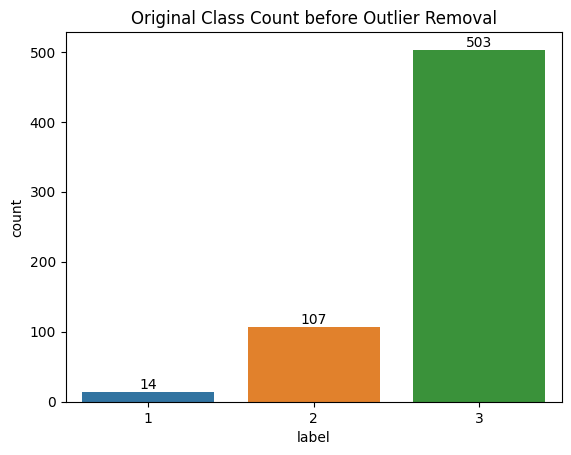

In [ ]:
y = df['label']
class_labels, class_counts = np.unique(y, return_counts=True)
for cl, cc in zip(class_labels, class_counts):
  print(f'Class {cl}: {cc} instances')

# Visualise class counts
class_count = sns.countplot(df, x='label')
plt.title('Original Class Count before Outlier Removal')
class_count.bar_label(class_count.containers[0])

### Data Visualisation

In [ ]:
# PCA
from sklearn.decomposition import PCA
import plotly.express as px
pca_org = PCA(n_components=2)
df_org_pca = pca_org.fit_transform(df.iloc[:, 1:])
# Transform into DataFrame data type
df_org_pca = pd.DataFrame(df_org_pca, columns=['PC1', 'PC2'])
df_org_pca['label'] = df['label']

# Scatter plot
df_org_pca['label'] = df_org_pca['label'].astype(str)
org = px.scatter(df_org_pca, x='PC1', y='PC2', color='label', title='Original Class Distribution')
org.show()

Locate the outlier

In [ ]:
# Outlier detection and removal
outlier_ind = df_org_pca.index[df_org_pca['PC1'] > 7].tolist() # datatype: list
df_org_pca.drop(outlier_ind, axis=0, inplace=True)

no_outl = px.scatter(df_org_pca, x='PC1', y='PC2', color='label', title='Class Distribution After Outliers Detection and Removal')
no_outl.show()

Remove the outlier

In [ ]:
df.drop([442], axis=0, inplace=True)

Check Class Counts Again

In [ ]:
df['label'].value_counts()

3    503
2    107
1     13
Name: label, dtype: int64

In [ ]:
# Re-assign label
y = df['label']
y.shape

(623,)

# Data Plotting

array([[<Axes: xlabel='label', ylabel='label'>,
        <Axes: xlabel='headpose_rx_avg', ylabel='label'>,
        <Axes: xlabel='headpose_ry_avg', ylabel='label'>, ...,
        <Axes: xlabel='3D-pos-x.17', ylabel='label'>,
        <Axes: xlabel='3D-pos-y.17', ylabel='label'>,
        <Axes: xlabel='3D-pos-z.17', ylabel='label'>],
       [<Axes: xlabel='label', ylabel='headpose_rx_avg'>,
        <Axes: xlabel='headpose_rx_avg', ylabel='headpose_rx_avg'>,
        <Axes: xlabel='headpose_ry_avg', ylabel='headpose_rx_avg'>, ...,
        <Axes: xlabel='3D-pos-x.17', ylabel='headpose_rx_avg'>,
        <Axes: xlabel='3D-pos-y.17', ylabel='headpose_rx_avg'>,
        <Axes: xlabel='3D-pos-z.17', ylabel='headpose_rx_avg'>],
       [<Axes: xlabel='label', ylabel='headpose_ry_avg'>,
        <Axes: xlabel='headpose_rx_avg', ylabel='headpose_ry_avg'>,
        <Axes: xlabel='headpose_ry_avg', ylabel='headpose_ry_avg'>, ...,
        <Axes: xlabel='3D-pos-x.17', ylabel='headpose_ry_avg'>,
        <Axes

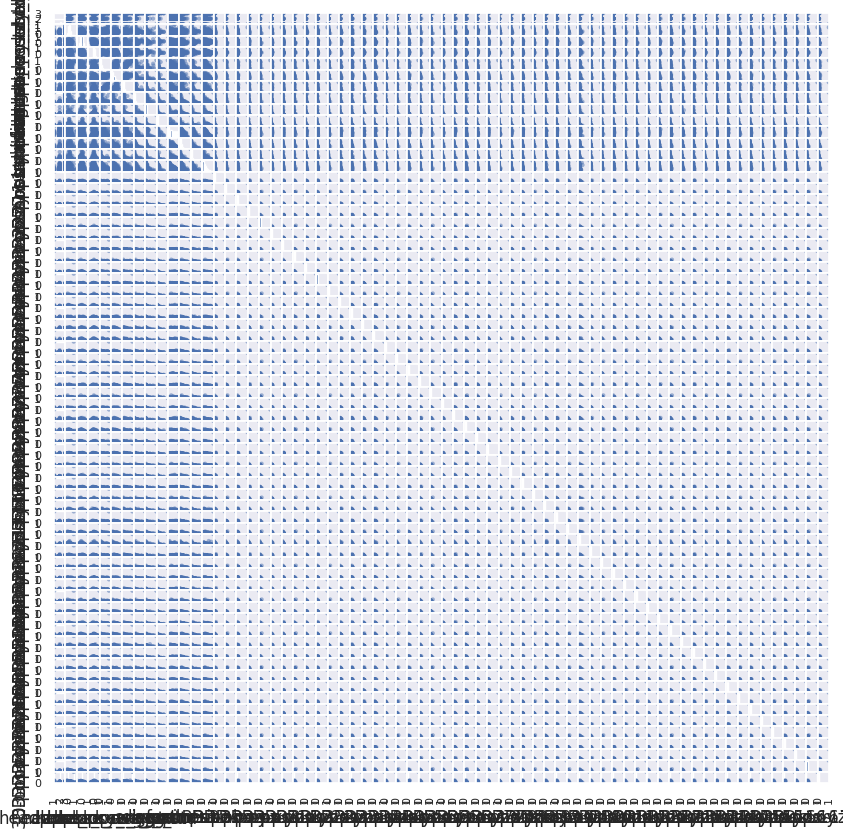

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

In [ ]:
# Selected columns
# colours = df['label'].map(lambda x: 'r' if x==1 else (x: 'g' if x==2 else x: 'b'))
pd.plotting.scatter_matrix(df.iloc[:, 0:7], figsize=(10, 10))

SyntaxError: ignored

# Correlation

<Axes: >

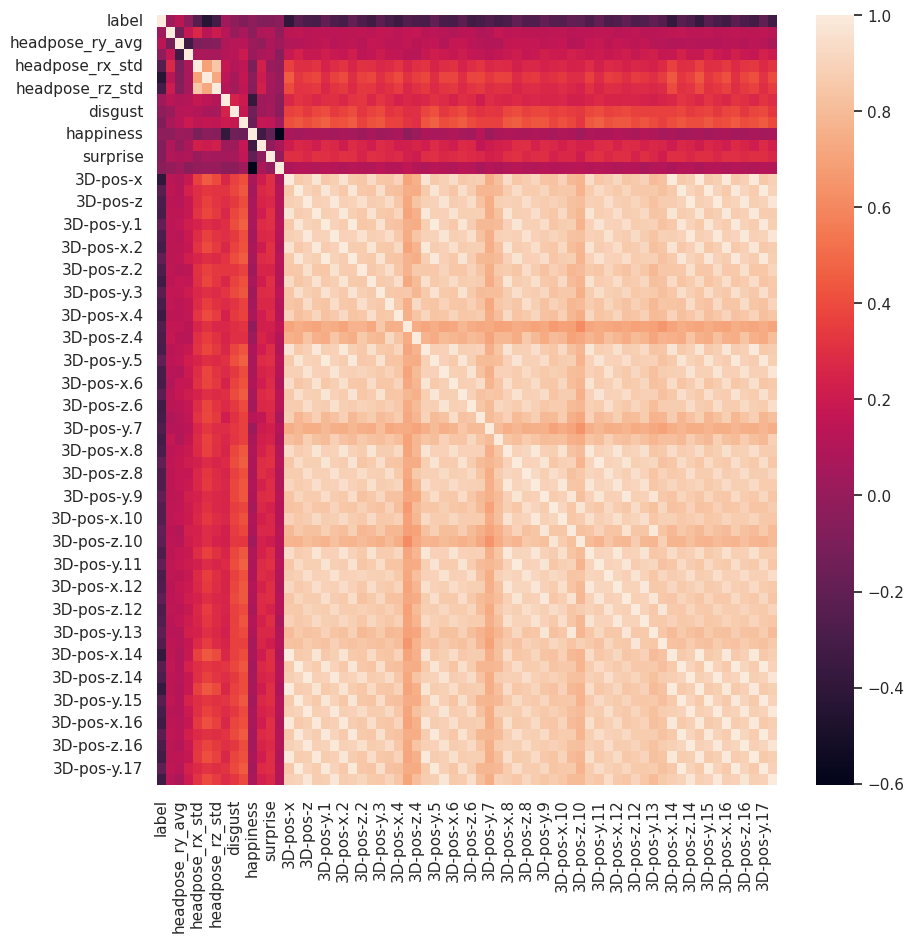

In [ ]:
corrcoe = df.corr()
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(corrcoe)

# Synthetic Data Generation

## Resample--Upsampling

In [ ]:
from sklearn.utils import resample
df_none = df[(df['label'] == 1)]
df_low = df[(df['label'] == 2)]
df_high = df[(df['label'] == 3)]
print(f'Number of Class 1 instances: {df_none.shape[0]}')
print(f'Number of Class 2 instances: {df_low.shape[0]}')
print(f'Number of Class 3 instances: {df_high.shape[0]}')
df['label'].value_counts()

Number of Class 1 instances: 13
Number of Class 2 instances: 107
Number of Class 3 instances: 503


3    503
2    107
1     13
Name: label, dtype: int64

[Text(0, 0, '13'), Text(0, 0, '107'), Text(0, 0, '503')]

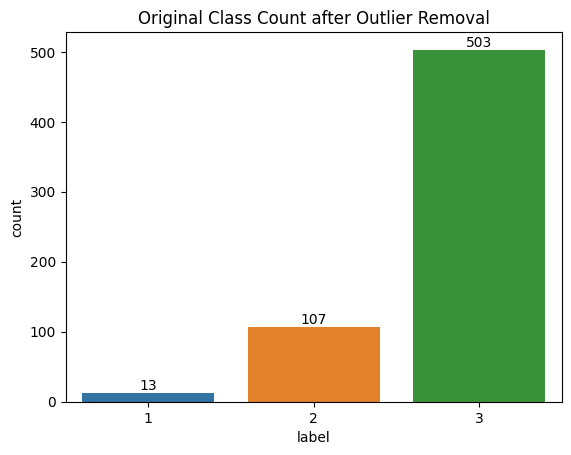

In [ ]:
# sns.set(rc={'figure.figsize': (5, 5)})
sns.reset_orig()
org = sns.countplot(df, x='label')
plt.title('Original Class Count after Outlier Removal')
org.bar_label(org.containers[0])

1    503
2    503
3    503
Name: label, dtype: int64


[Text(0, 0, '503'), Text(0, 0, '503'), Text(0, 0, '503')]

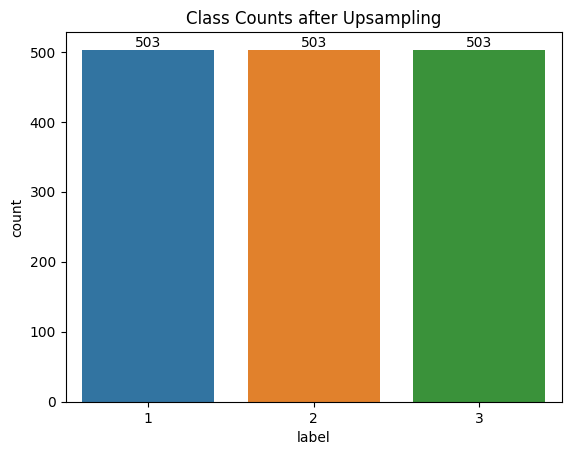

In [ ]:
# Upsampling Label '0' instance
df_none_ups = resample(df_none,
                       replace=True, # Sample with replacement
                       n_samples=df_high.shape[0], # To match the High class
                       random_state=42) # Reproducible results
# Upsampling Label '1' instance
df_low_ups = resample(df_low,
                      replace=True,
                      n_samples=df_high.shape[0],
                      random_state=42)
df_ups = pd.concat([df_none_ups, df_low_ups, df_high])
print(df_ups['label'].value_counts())
cp = sns.countplot(df_ups, x='label')
plt.title('Class Counts after Upsampling')
cp.bar_label(cp.containers[0])

### Class distribution scatter plot

In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
# Apply PCA to reduce the dimensionality to 3 dimensions
pca_up = PCA(n_components=2)
X_up_reduced = pca_up.fit_transform(df_ups.iloc[:, 1:])
# print(X_up_reduced)
# X_up_reduced = pd.DataFrame(X_up_reduced, columns=['PC1', 'PC2', 'PC3'])
X_up_reduced = pd.DataFrame(X_up_reduced, columns=['PC1', 'PC2'])
# X_up_reduced.head(4)
# print(X_up_reduced.shape)
# print('Total label count:', df_ups['label'].shape)
temp = df_ups['label'].reset_index(drop=True)
# print(temp)
# df_pca = pd.concat([df_ups['label'], X_up_reduced])
X_up_reduced['label'] = temp
X_up_reduced.head(5)

,PC1,PC2,label
0,0.989527,-0.287031,1
1,-0.080182,0.005079,1
2,0.610213,0.169398,1
3,1.127998,-0.321135,1
4,-0.127051,-0.039427,1


In [ ]:
# Create a scatter plot to visualise the data
# From 3D scatter plot, data mainly spread on a 2D plane, so 2D is more suitable in this case.
# fig = px.scatter_3d(X_up_reduced, x='PC1', y='PC2', z='PC3', color='label')

# Distinguishing different class using discrete colours
X_up_reduced['label'] = X_up_reduced['label'].astype(str)
fig = px.scatter(X_up_reduced, x='PC1', y='PC2', color='label', title='Upsampled Label Distribution after PCA')
fig.show()

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

sm = SMOTE(random_state=42)

In [ ]:
X_sm, y_sm = sm.fit_resample(df.iloc[:, 1:], y)

In [ ]:
print(y_sm)
df_sm = pd.concat([X_sm, y_sm], axis=1)

0       1
1       2
2       3
3       3
4       3
       ..
1504    2
1505    2
1506    2
1507    2
1508    2
Name: label, Length: 1509, dtype: int64


[503 503 503]
Counter({1: 503, 2: 503, 3: 503})
1    503
2    503
3    503
Name: label, dtype: int64


[Text(0, 0, '503'), Text(0, 0, '503'), Text(0, 0, '503')]

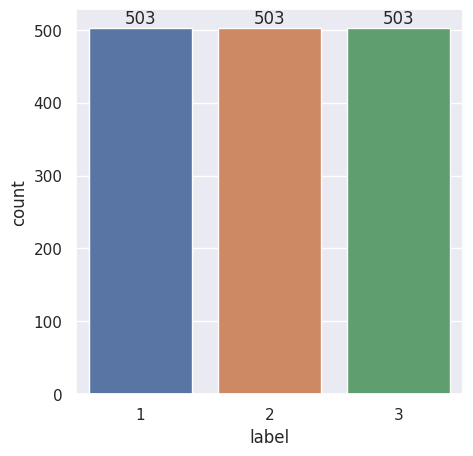

In [ ]:
# Check label counts
from typing import Counter
counter = Counter(y_sm)
print(np.array(y_sm.value_counts()))
print(counter)
print(y_sm.value_counts())
cplot = sns.countplot(df_sm, x='label')
cplot.bar_label(cplot.containers[0])

Class Distribution Visualisation

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# PCA: Dimensionality reduction to 2 dimensions, so data can be illustrated
# through scatter plot
pca_sm = PCA(n_components=2)
df_sm_pca = pca_sm.fit_transform(df_sm.iloc[:, :-1])
# Transform into DataFrame data type
df_sm_pca = pd.DataFrame(df_sm_pca, columns=['PC1', 'PC2'])
df_sm_pca['label'] = df_sm['label']
df_sm_pca

,PC1,PC2,label
0,0.007427,-0.310047,1
1,-0.046517,0.318553,2
2,-0.244476,0.295265,3
3,-0.284210,0.447573,3
4,-0.368371,-0.320143,3
...,...,...,...
1504,-0.145416,-0.096425,2
1505,0.111716,0.168871,2
1506,-0.174728,0.143216,2
1507,-0.222063,0.652081,2


In [ ]:
# Plot PC1 and PC2
df_sm_pca['label'] = df_sm_pca['label'].astype(str)
sm_sct = px.scatter(df_sm_pca, x='PC1', y='PC2', color='label', title='SMOTE Oversampled Label Distribution after PCA')
sm_sct.show()

# Classification Models

## SVM

In [ ]:
from sklearn import svm
import sklearn.model_selection as model_selection
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Source data

Prepare training and test set

In [ ]:
X = df.iloc[:, 1:]
y = df['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    train_size = 0.75,
                                                                    test_size = 0.25,
                                                                    random_state=42)


NameError: ignored

Training: Fit model

In [ ]:
rbf_clf = svm.SVC(kernel='rbf', gamma = 0.5, C=0.1).fit(X_train, y_train)

Predictions

In [ ]:
rbf_pred = rbf_clf.predict(X_test)

Measures

In [ ]:
# rbf_acc = accuracy_score(y_test, rbf_pred)
# rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
rbf_report = classification_report(y_test, rbf_pred)
print("Classification report:\n", rbf_report)

Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        27
           3       0.79      1.00      0.89       124

    accuracy                           0.79       156
   macro avg       0.26      0.33      0.30       156
weighted avg       0.63      0.79      0.70       156



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

[[  0   0   5]
 [  0   0  27]
 [  0   0 124]]


Text(0.5, 1.0, 'Confusion Matrix - SVM - Original Dataset')

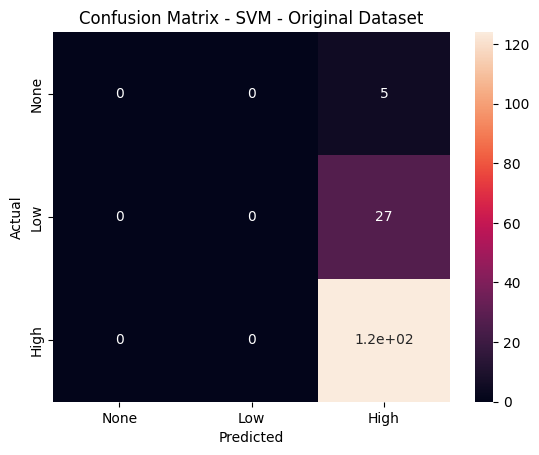

In [ ]:
cm_rbf = confusion_matrix(y_test, rbf_pred)
print(cm_rbf)
sns.heatmap(cm_rbf, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Original Dataset')

### Upsampling processed data

With Outliers

In [ ]:
# Prepare training and test set
X_up = df_ups.iloc[:, 1:]
y_up = df_ups['label']
X_up_train, X_up_test, y_up_train, y_up_test = model_selection.train_test_split(X_up, y_up,
                                                                    train_size=0.75,
                                                                    test_size=0.25,
                                                                    random_state=42)

In [ ]:
# Fit model
rbf_up_clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_up_train, y_up_train)

In [ ]:
# Prediction
rbf_up_pred = rbf_up_clf.predict(X_up_test)

In [ ]:
# Report
rbf_up_report = classification_report(y_up_test, rbf_up_pred)
print('SVM(RBF) Classification Report: \n', rbf_up_report)

SVM(RBF) Classification Report: 
               precision    recall  f1-score   support

           1       0.80      0.94      0.87       123
           2       0.65      0.46      0.54       122
           3       0.68      0.75      0.71       133

    accuracy                           0.72       378
   macro avg       0.71      0.72      0.71       378
weighted avg       0.71      0.72      0.71       378



[[116   7   0]
 [ 19  56  47]
 [ 10  23 100]]


Text(0.5, 1.0, 'Confusion Matrix - SVM (RBF)')

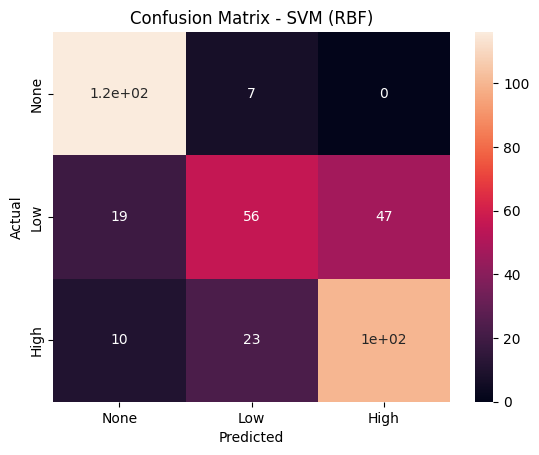

In [ ]:
# Confusion Matrix
cm_rbf_up = confusion_matrix(y_up_test, rbf_up_pred)

print(cm_rbf_up)
sns.heatmap(cm_rbf_up, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (RBF)')

Without Outliers

SVM(RBF) Classification Report: 
               precision    recall  f1-score   support

           1       0.81      0.93      0.86       123
           2       0.64      0.48      0.55       122
           3       0.68      0.75      0.71       133

    accuracy                           0.72       378
   macro avg       0.71      0.72      0.71       378
weighted avg       0.71      0.72      0.71       378

[[114   9   0]
 [ 17  58  47]
 [ 10  23 100]]


Text(0.5, 1.0, 'Confusion Matrix - SVM (RBF) - No Outliers')

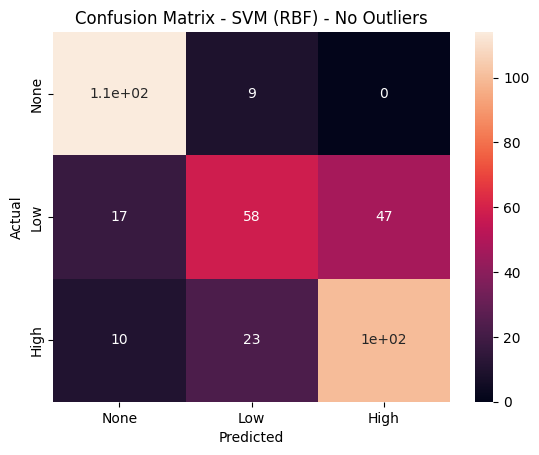

In [ ]:
# Prepare training and test set
X_up = df_ups.iloc[:, 1:]
y_up = df_ups['label']
X_up_train, X_up_test, y_up_train, y_up_test = model_selection.train_test_split(X_up, y_up,
                                                                    train_size=0.75,
                                                                    test_size=0.25,
                                                                    random_state=42)
# Fit model
rbf_up_clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_up_train, y_up_train)
# Prediction
rbf_up_pred = rbf_up_clf.predict(X_up_test)
# Report
rbf_up_report = classification_report(y_up_test, rbf_up_pred)
print('SVM(RBF) Classification Report: \n', rbf_up_report)
# Confusion Matrix
cm_rbf_up = confusion_matrix(y_up_test, rbf_up_pred)

print(cm_rbf_up)
sns.heatmap(cm_rbf_up, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (RBF) - No Outliers')

### Weighted

### SMOTE processed data

With Outliers

In [ ]:
# Data preparing
X_sm_train, X_sm_test, y_sm_train, y_sm_test = model_selection.train_test_split(X_sm, y_sm,
                                                                                train_size=0.75,
                                                                                test_size=0.25,
                                                                                random_state=42)

In [ ]:
# Train model
svm_sm_clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_sm_train, y_sm_train)
# Make prediction
svm_sm_pred = svm_sm_clf.predict(X_sm_test)

In [ ]:
# Test report
svm_sm_report = classification_report(y_sm_test, svm_sm_pred)
print('SVM(RBF) with SMOTE classification report: \n', svm_sm_report)

SVM(RBF) with SMOTE classification report: 
               precision    recall  f1-score   support

           1       0.82      0.95      0.88       128
           2       0.71      0.38      0.49       130
           3       0.61      0.82      0.70       120

    accuracy                           0.71       378
   macro avg       0.72      0.72      0.69       378
weighted avg       0.72      0.71      0.69       378



[[122   6   0]
 [ 19  49  62]
 [  7  14  99]]


Text(0.5, 1.0, 'Confusion Matrix - SVM(RBF) - SMOTE')

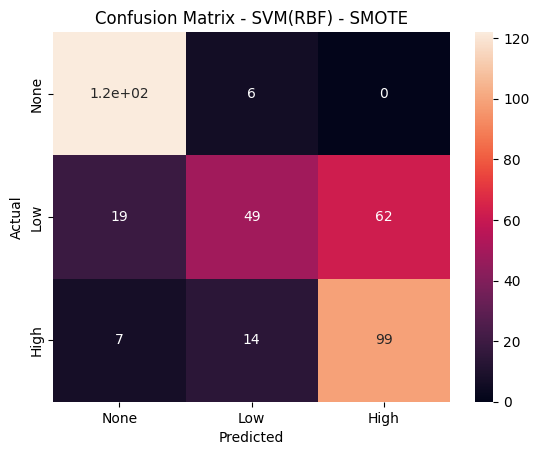

In [ ]:
cm_svm_sm = confusion_matrix(y_sm_test, svm_sm_pred) # Compute confusion matrix
print(cm_svm_sm) # Display predicted classes distribution
sns.heatmap(cm_svm_sm, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM(RBF) - SMOTE')

Without Outliers

SVM(RBF) with SMOTE classification report: 
               precision    recall  f1-score   support

           1       0.84      0.99      0.91       128
           2       0.82      0.37      0.51       132
           3       0.62      0.87      0.73       118

    accuracy                           0.74       378
   macro avg       0.76      0.75      0.71       378
weighted avg       0.76      0.74      0.71       378

[[127   1   0]
 [ 20  49  63]
 [  5  10 103]]


Text(0.5, 1.0, 'Confusion Matrix - SVM(RBF) - SMOTE - No Outliers')

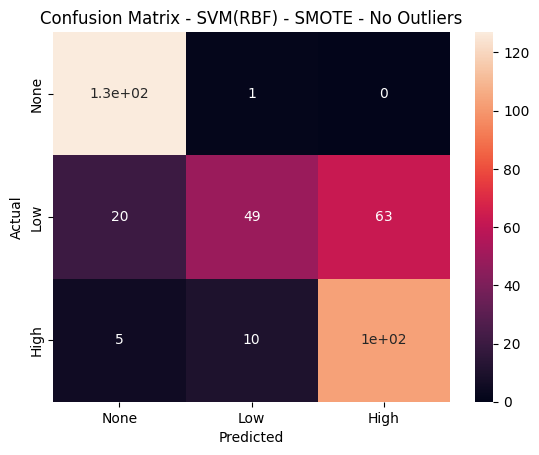

In [ ]:
# Data preparing
X_sm_train, X_sm_test, y_sm_train, y_sm_test = model_selection.train_test_split(X_sm, y_sm,
                                                                                train_size=0.75,
                                                                                test_size=0.25,
                                                                                random_state=42)
# Train model
svm_sm_clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_sm_train, y_sm_train)
# Make prediction
svm_sm_pred = svm_sm_clf.predict(X_sm_test)
# Test report
svm_sm_report = classification_report(y_sm_test, svm_sm_pred)
print('SVM(RBF) with SMOTE classification report: \n', svm_sm_report)
# Confusion matrix
cm_svm_sm = confusion_matrix(y_sm_test, svm_sm_pred) # Compute confusion matrix
print(cm_svm_sm) # Display predicted classes distribution
sns.heatmap(cm_svm_sm, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM(RBF) - SMOTE - No Outliers')

After removing outliers in class 1, we observed a significant improvement in accuracy and other relevant metrics, with an overall increase of approximately 3%. However, it's important to note that the classification performance for class 2 remains unsatisfactory. This issue may be attributed to the substantial overlap between the feature distributions of class 2 and class 3, making it challenging to distinguish between them accurately. Further analysis and feature engineering may be required to address this specific classification challenge effectively.

### Hyperparameter Tuning: Gamma & C

## Random Forest

# Under-sampling: Condensed Nearest Neighbour

In [ ]:
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = df.iloc[:, 1:], df['label']
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({3: 503, 2: 107, 1: 13})
Counter({3: 30, 2: 22, 1: 13})


Scatter plot

In [ ]:
# PCA
from sklearn.decomposition import PCA
import plotly.express as px
pca_org = PCA(n_components=2)
df_und_pca = pca_org.fit_transform(X)
# Transform into DataFrame data type
df_und_pca = pd.DataFrame(df_und_pca, columns=['PC1', 'PC2'])
df_und_pca['label'] = y

# Scatter plot
df_und_pca['label'] = df_und_pca['label'].astype(str)
org = px.scatter(df_und_pca, x='PC1', y='PC2', color='label', title='CNN Undersampled Class Distribution')
org.show()

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



SVM(RBF) with Downsampling classification report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.35      1.00      0.52         6

    accuracy                           0.35        17
   macro avg       0.12      0.33      0.17        17
weighted avg       0.12      0.35      0.18        17

SVM Undersampled Confusion Matrix:
 [[0 0 5]
 [0 0 6]
 [0 0 6]]


Text(0.5, 1.0, 'Confusion Matrix - SVM Undersampled')

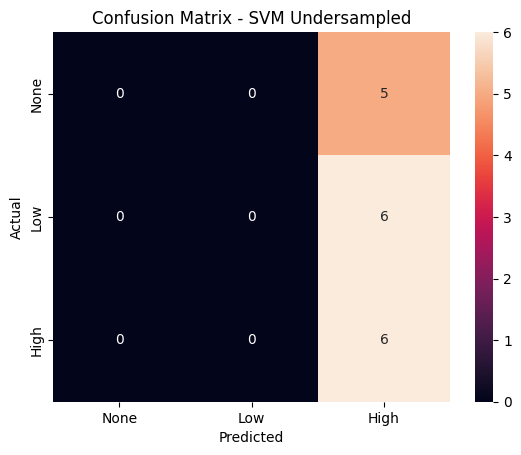

In [ ]:
# Split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=42)
# Train model
svm_undsmp = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42)
svm_undsmp.fit(X_train, y_train)
y_pred = svm_undsmp.predict(X_test)

# Classification report
svm_undsmp_report = classification_report(y_test, y_pred)
print('SVM(RBF) with Downsampling classification report: \n', svm_undsmp_report)
# Confusion matrix
svm_undsmp__cm = confusion_matrix(y_test, y_pred)
print('SVM Undersampled Confusion Matrix:\n',svm_undsmp__cm)
sns.heatmap(svm_undsmp__cm, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Undersampled')

# Downsampling + SVM Pipeline

In [ ]:
# Training data preparation
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=42)

SVM(RBF) with Downsampling classification report: 
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.41      0.59      0.49        29
           3       0.92      0.81      0.86       124

    accuracy                           0.77       156
   macro avg       0.61      0.80      0.67       156
weighted avg       0.82      0.77      0.79       156

SMOTETomek_svm Confusion Matrix:
 [[  3   0   0]
 [  3  17   9]
 [  0  24 100]]


Text(0.5, 1.0, 'Confusion Matrix - SMOTETomek_svm - No Outliers')

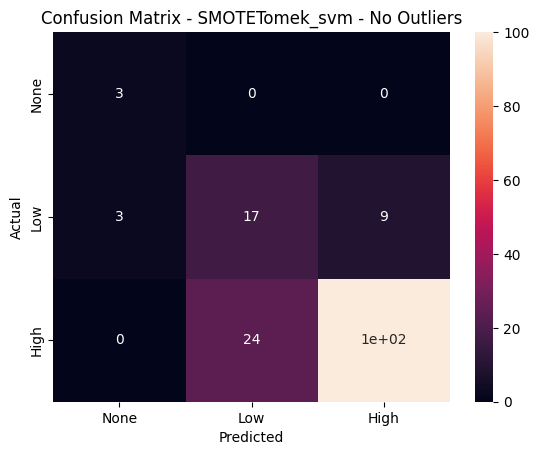

In [ ]:
# Classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
# Undersampling/Downsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
# Visualisation
import matplotlib.pyplot as plt

# Training model: Majority resampling strategy
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                    svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42))
SMOTETomek_svm = SMOTETomek_pipeline
SMOTETomek_svm.fit(X_train, y_train)
y_pred = SMOTETomek_svm.predict(X_test)

# Test report
SMOTETomek_svm_report = classification_report(y_test, y_pred)
print('SVM(RBF) with Downsampling classification report: \n', SMOTETomek_svm_report)
# Confusion matrix
SMOTETomek_svm_cm = confusion_matrix(y_test, y_pred)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_cm)
sns.heatmap(SMOTETomek_svm_cm, annot=True,
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTETomek_svm - No Outliers')

High recalls signify the success of the classifier and undersampling method.

SVM(RBF) with Downsampling classification report: 
               precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.44      0.59      0.50        29
           3       0.92      0.81      0.86       124

    accuracy                           0.78       156
   macro avg       0.59      0.80      0.65       156
weighted avg       0.82      0.78      0.79       156

SMOTETomek_svm Confusion Matrix:
 [[  3   0   0]
 [  3  17   9]
 [  1  22 101]]


Text(0.5, 1.0, 'Confusion Matrix - SMOTETomek_svm - No Outliers')

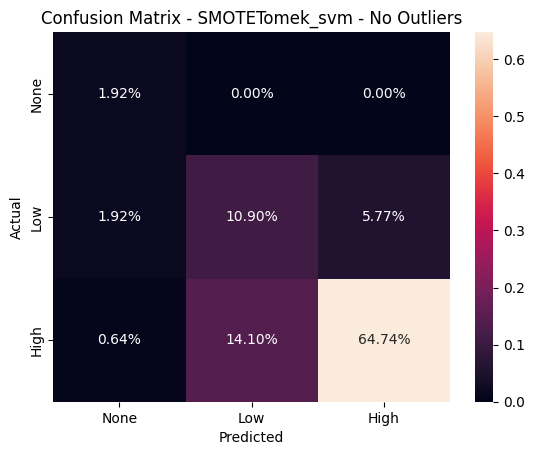

In [ ]:
# Classifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
# Undersampling/Downsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
# Visualisation
import matplotlib.pyplot as plt

# Training model: Majority resampling strategy
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='auto')),
                                    svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=42))
SMOTETomek_svm = SMOTETomek_pipeline
SMOTETomek_svm.fit(X_train, y_train)
y_pred = SMOTETomek_svm.predict(X_test)

# Test report
SMOTETomek_svm_report = classification_report(y_test, y_pred)
print('SVM(RBF) with Downsampling classification report: \n', SMOTETomek_svm_report)
# Confusion matrix
SMOTETomek_svm_cm = confusion_matrix(y_test, y_pred)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_cm)
sns.heatmap(SMOTETomek_svm_cm/np.sum(SMOTETomek_svm_cm), annot=True, fmt='.2%',
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTETomek_svm - No Outliers')

### Downsampling

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks

# Training set
X = df.drop(columns=['label'])
y = df['label']

print('Original dataset shape %s' % Counter(y))
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({3: 503, 2: 107, 1: 13})
Resampled dataset shape Counter({3: 483, 2: 88, 1: 13})


Resampled dataset scatter plot

In [ ]:
# PCA
from sklearn.decomposition import PCA
import plotly.express as px
pca_org = PCA(n_components=2)
df_res_pca = pca_org.fit_transform(X_res)
# Transform into DataFrame data type
df_res_pca = pd.DataFrame(df_res_pca, columns=['PC1', 'PC2'])
df_res_pca['label'] = y_res

# Scatter plot
df_res_pca['label'] = df_res_pca['label'].astype(str)
org = px.scatter(df_res_pca, x='PC1', y='PC2', color='label', title='Resampled Class Distribution')
org.show()

# Downsampling + RF Pipeline

Original dataset

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



SVM(RBF) with Downsampling classification report: 
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.43      0.66      0.52        29
           3       0.92      0.81      0.86       124

    accuracy                           0.77       156
   macro avg       0.56      0.60      0.57       156
weighted avg       0.82      0.77      0.79       156

SMOTETomek_svm Confusion Matrix:
 [[  1   1   1]
 [  2  19   8]
 [  0  24 100]]


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

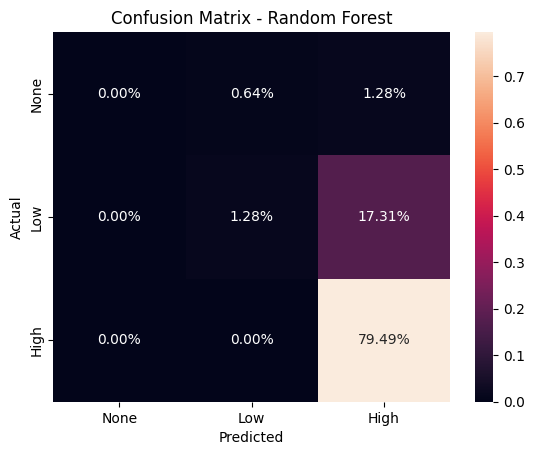

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Test report
rf_report = classification_report(y_test, y_pred)
print('SVM(RBF) with Downsampling classification report: \n', SMOTETomek_svm_report)
# Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_cm)
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, fmt='.2%',
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

Resampled

SVM(RBF) with Downsampling classification report: 
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.43      0.66      0.52        29
           3       0.92      0.81      0.86       124

    accuracy                           0.77       156
   macro avg       0.56      0.60      0.57       156
weighted avg       0.82      0.77      0.79       156

SMOTETomek_svm Confusion Matrix:
 [[  1   1   1]
 [  2  19   8]
 [  0  24 100]]


Text(0.5, 1.0, 'Confusion Matrix - SMOTETomek_RF')

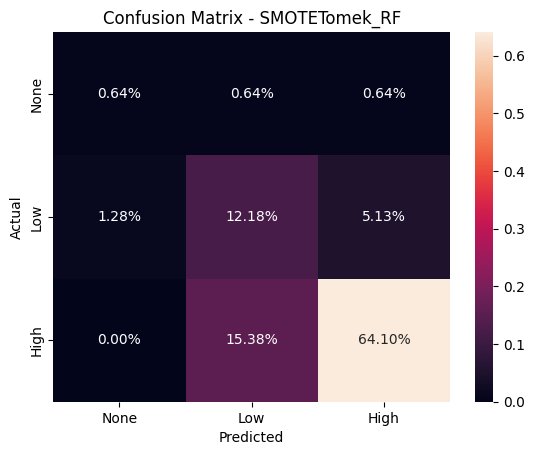

In [ ]:
# Classifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Undersampling/Downsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
# Visualisation
import matplotlib.pyplot as plt

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='auto')),
                              RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))

SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

y_pred = SMOTETomek_rf.predict(X_test)

# Test report
SMOTETomek_svm_report = classification_report(y_test, y_pred)
print('SVM(RBF) with Downsampling classification report: \n', SMOTETomek_svm_report)
# Confusion matrix
SMOTETomek_svm_cm = confusion_matrix(y_test, y_pred)
print('SMOTETomek_svm Confusion Matrix:\n',SMOTETomek_svm_cm)
sns.heatmap(SMOTETomek_svm_cm/np.sum(SMOTETomek_svm_cm), annot=True, fmt='.2%',
            xticklabels=['None', 'Low', 'High'],
            yticklabels=['None', 'Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTETomek_RF')